# Analyzing Ford GoBike Data
Dec-2019

by Fernando de Moraes Gabriel

## Introduction
In this project, the Ford GoBike System Dateset that contains trip data from lyft's bike service for public use was analyzed.

> Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around.
> More about the data [here](https://www.fordgobike.com/system-data)

## Preliminary Wrangling

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import glob
import os
import datetime

> The csv files for the period January-June 2019 was downloaded to the author's computer and combined into the fordgobike_master.csv, using the glob and the Dataset functions:
>
>path = '../data/'
>
>files = glob.glob(os.path.join(path, "*.csv"))
>
>df = pd.concat((pd.read_csv(f) for f in files), ignore_index = True)
>
>df.to_csv('fordgobike_master.csv', index = False)


In [2]:
df = pd.read_csv('fordgobike_master.csv', sep=',')
df.head()

/home/fernando/anaconda3/envs/Udacity/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,4861,No,80825,196.0,37.808894,-122.256460,Grand Ave at Perkins St,2019-02-01 16:24:49.8640,1989.0,Male,NaN,229.0,37.775745,-122.213037,Foothill Blvd at 42nd Ave,2019-01-31 17:57:44.6130,Subscriber
1,5506,No,65900,134.0,37.752428,-122.420628,Valencia St at 24th St,2019-02-01 15:16:54.1730,1989.0,Male,NaN,4.0,37.785881,-122.408915,Cyril Magnin St at Ellis St,2019-01-31 20:58:33.8860,Subscriber
2,2717,No,62633,157.0,37.846784,-122.291376,65th St at Hollis St,2019-02-01 11:30:46.5300,1965.0,Female,NaN,245.0,37.870139,-122.268422,Downtown Berkeley BART,2019-01-31 18:06:52.9240,Customer
3,4557,No,44680,53.0,37.775946,-122.437777,Grove St at Divisadero,2019-02-01 08:10:50.3180,1974.0,Male,NaN,85.0,37.770083,-122.429156,Church St at Duboce Ave,2019-01-31 19:46:09.7190,Customer
4,2100,No,60709,28.0,37.787168,-122.388098,The Embarcadero at Bryant St,2019-02-01 07:10:51.0650,NaN,NaN,NaN,16.0,37.794130,-122.394430,Steuart St at Market St,2019-01-31 14:19:01.5410,Customer


In [3]:
# Understanding the dataset
df.sample(10)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
74117,2030,No,571,25.0,37.787522,-122.397405,Howard St at 2nd St,2019-01-23 08:27:39.1500,1986.0,Male,NaN,78.0,37.773717,-122.411647,Folsom St at 9th St,2019-01-23 08:18:07.5250,Subscriber
1211106,27,No,1184,102.0,37.766883,-122.399579,Irwin St at 8th St,2019-05-06 16:32:40.5040,1992.0,Male,NaN,74.0,37.776435,-122.426244,Laguna St at Hayes St,2019-05-06 16:12:56.1050,Customer
1091491,1177,No,201,50.0,37.780526,-122.390288,2nd St at Townsend St,2019-05-27 23:00:02.5810,1983.0,Male,NaN,30.0,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2019-05-27 22:56:40.8880,Subscriber
466099,1449,No,276,125.0,37.759200,-122.409851,20th St at Bryant St,2019-04-18 06:51:28.8520,NaN,NaN,NaN,99.0,37.767037,-122.415442,Folsom St at 15th St,2019-04-18 06:46:52.6150,Customer
154302,4716,No,789,364.0,37.772000,-122.389970,China Basin St at 3rd St,2019-01-08 22:14:57.1380,1995.0,Male,NaN,9.0,37.798572,-122.400869,Broadway at Battery St,2019-01-08 22:01:47.4070,Subscriber
331802,1118,No,2172,81.0,37.775880,-122.393170,Berry St at 4th St,2019-06-08 15:27:35.6500,1992.0,Female,NaN,6.0,37.804770,-122.403234,The Embarcadero at Sansome St,2019-06-08 14:51:23.4750,Customer
1233023,1707,No,496,50.0,37.780526,-122.390288,2nd St at Townsend St,2019-05-02 15:22:01.5250,1992.0,Male,NaN,21.0,37.789625,-122.400811,Montgomery St BART Station (Market St at 2nd St),2019-05-02 15:13:44.8860,Subscriber
612735,5805,No,560,312.0,37.329732,-121.901782,San Jose Diridon Station,2019-04-02 07:10:09.3740,1977.0,Male,NaN,295.0,37.332794,-121.875926,William St at 10th St,2019-04-02 07:00:49.1890,Subscriber
317817,3664,No,81,337.0,37.806970,-122.266588,Webster St at 19th St,2019-06-11 07:05:11.9310,1964.0,Male,NaN,182.0,37.809013,-122.268247,19th Street BART Station,2019-06-11 07:03:50.4090,Subscriber
521873,3208,No,527,100.0,37.767100,-122.410662,Bryant St at 15th St,2019-04-11 08:17:33.1690,NaN,NaN,NaN,75.0,37.773793,-122.421239,Market St at Franklin St,2019-04-11 08:08:45.6090,Subscriber


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244839 entries, 0 to 1244838
Data columns (total 17 columns):
bike_id                    1244839 non-null int64
bike_share_for_all_trip    1240946 non-null object
duration_sec               1244839 non-null int64
end_station_id             1241832 non-null float64
end_station_latitude       1244839 non-null float64
end_station_longitude      1244839 non-null float64
end_station_name           1241832 non-null object
end_time                   1244839 non-null object
member_birth_year          1176326 non-null float64
member_gender              1176550 non-null object
rental_access_method       3893 non-null object
start_station_id           1241934 non-null float64
start_station_latitude     1244839 non-null float64
start_station_longitude    1244839 non-null float64
start_station_name         1241934 non-null object
start_time                 1244839 non-null object
user_type                  1244839 non-null object
dtypes: float64(7)

In [5]:
df.shape

(1244839, 17)

In [6]:
# check duplicates
df.duplicated().sum()

0

In [7]:
# check NaN values
df.isna().sum()

bike_id                          0
bike_share_for_all_trip       3893
duration_sec                     0
end_station_id                3007
end_station_latitude             0
end_station_longitude            0
end_station_name              3007
end_time                         0
member_birth_year            68513
member_gender                68289
rental_access_method       1240946
start_station_id              2905
start_station_latitude           0
start_station_longitude          0
start_station_name            2905
start_time                       0
user_type                        0
dtype: int64

### Cleaning Data
After the assessing data process, it was possible identify some quality issues to be cleaned for the analysis, these are described below:

In [8]:
# Copying the dataset
df_clean = df.copy()

#### There are not appropiate data types for some columns
##### Define
- Convert the following columns to string: start_station_id, end_station_id and bike_id
- Convert the following columns to timestamp: start_time and end_time
- Convert the following column to integer: member_birth_year
- Convert the following column to category: user_type, member_gender and bike_share_for_all_trip

##### Code

In [9]:
def change_to_string(df,fields):
    for field in fields:
        df[field] = df[field].astype(np.object)


def change_to_timestamp(df,fields):
    for field in fields:
        df[field] = df[field].astype('datetime64[ns]')


def change_to_category(df,fields):
    for field in fields:
        df[field] = df[field].astype('category')

In [10]:
change_to_string (df_clean,['start_station_id', 'end_station_id','bike_id'])
change_to_timestamp (df_clean,['start_time', 'end_time'])
change_to_category (df_clean,['user_type', 'member_gender', 'bike_share_for_all_trip'])

##### Test

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244839 entries, 0 to 1244838
Data columns (total 17 columns):
bike_id                    1244839 non-null object
bike_share_for_all_trip    1240946 non-null category
duration_sec               1244839 non-null int64
end_station_id             1241832 non-null object
end_station_latitude       1244839 non-null float64
end_station_longitude      1244839 non-null float64
end_station_name           1241832 non-null object
end_time                   1244839 non-null datetime64[ns]
member_birth_year          1176326 non-null float64
member_gender              1176550 non-null category
rental_access_method       3893 non-null object
start_station_id           1241934 non-null object
start_station_latitude     1244839 non-null float64
start_station_longitude    1244839 non-null float64
start_station_name         1241934 non-null object
start_time                 1244839 non-null datetime64[ns]
user_type                  1244839 non-null catego

#### There are some missing values
##### Define
- Drop the rows with nulls start_station_id or end_station_id
- Drop the rows with null member_birth_year
- Drop the column rental_access_method

#### Code

In [12]:
df_clean.start_station_id.isna().sum()

2905

In [13]:
df_clean.drop(df_clean[df_clean['start_station_id'].isnull()].index, inplace = True)

In [14]:
df_clean.end_station_id.isna().sum()

543

In [15]:
df_clean.drop(df_clean[df_clean['end_station_id'].isnull()].index, inplace = True)

In [16]:
df_clean.drop(df_clean[df_clean['member_birth_year'].isnull()].index, inplace = True)

df_clean = df_clean.drop(['rental_access_method'], axis=1)


##### Test

In [17]:
df_clean.isna().sum()

bike_id                       0
bike_share_for_all_trip    1025
duration_sec                  0
end_station_id                0
end_station_latitude          0
end_station_longitude         0
end_station_name              0
end_time                      0
member_birth_year             0
member_gender                 0
start_station_id              0
start_station_latitude        0
start_station_longitude       0
start_station_name            0
start_time                    0
user_type                     0
dtype: int64

#### Standardizing column values
##### Define
- Standardize gender column values

#### Code

In [18]:
df_clean.member_gender.value_counts()

Male      870973
Female    279637
Other      22197
M            906
F            119
O              0
?              0
Name: member_gender, dtype: int64

In [19]:
df_clean = df_clean.replace({'member_gender' : {'M': 'Male', 'F': 'Female', 'O': 'Other', '?': 'Other'}})

##### Test

In [20]:
df_clean.member_gender.value_counts()

Male      871879
Female    279756
Other      22197
Name: member_gender, dtype: int64

#### Adding interesting columns in the dataset
##### Define
- Add a column for the member age, calculating it by subtracting their birth year from the current year (2019)
- Add columns for the start month and day of the week
- Add a column for the duration in minutes

#### Code

In [21]:
# Member Age
current_year = 2019
df_clean['member_age'] = current_year - df_clean['member_birth_year']

# Start month
df_clean['start_month'] = df_clean['start_time'].dt.strftime('%B')

# Start weekday
df_clean['start_weekday'] = df_clean['start_time'].dt.strftime('%a')

# Duration in minutes
df_clean['duration_min'] = df_clean['duration_sec'] / 60

##### Test

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1173832 entries, 0 to 1244838
Data columns (total 20 columns):
bike_id                    1173832 non-null object
bike_share_for_all_trip    1172807 non-null category
duration_sec               1173832 non-null int64
end_station_id             1173832 non-null object
end_station_latitude       1173832 non-null float64
end_station_longitude      1173832 non-null float64
end_station_name           1173832 non-null object
end_time                   1173832 non-null datetime64[ns]
member_birth_year          1173832 non-null float64
member_gender              1173832 non-null object
start_station_id           1173832 non-null object
start_station_latitude     1173832 non-null float64
start_station_longitude    1173832 non-null float64
start_station_name         1173832 non-null object
start_time                 1173832 non-null datetime64[ns]
user_type                  1173832 non-null category
member_age                 1173832 non-null flo

In [23]:
df_clean.sample(10)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,member_age,start_month,start_weekday,duration_min
420066,547,No,1052,67,37.776639,-122.395526,San Francisco Caltrain Station 2 (Townsend St...,2019-04-25 08:43:21.948,1993.0,Male,133,37.755213,-122.420975,Valencia St at 22nd St,2019-04-25 08:25:49.782,Customer,26.0,April,Thu,17.533333
591431,6536,No,584,15,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2019-04-04 08:47:58.891,1989.0,Female,5,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2019-04-04 08:38:14.293,Subscriber,30.0,April,Thu,9.733333
836590,2881,No,625,59,37.774814,-122.418954,S Van Ness Ave at Market St,2019-03-07 10:03:19.628,1985.0,Male,133,37.755213,-122.420975,Valencia St at 22nd St,2019-03-07 09:52:54.503,Subscriber,34.0,March,Thu,10.416667
1198194,1591,No,1082,364,37.772000,-122.389970,China Basin St at 3rd St,2019-05-08 10:03:47.507,1983.0,Male,16,37.794130,-122.394430,Steuart St at Market St,2019-05-08 09:45:45.336,Subscriber,36.0,May,Wed,18.033333
405288,3366,No,773,50,37.780526,-122.390288,2nd St at Townsend St,2019-04-27 12:20:06.172,1996.0,Male,370,37.787327,-122.413278,Jones St at Post St,2019-04-27 12:07:13.105,Customer,23.0,April,Sat,12.883333
857200,5544,No,671,85,37.770083,-122.429156,Church St at Duboce Ave,2019-03-04 17:41:54.125,1983.0,Female,79,37.773492,-122.403672,7th St at Brannan St,2019-03-04 17:30:42.337,Subscriber,36.0,March,Mon,11.183333
1117381,3537,No,697,16,37.794130,-122.394430,Steuart St at Market St,2019-05-22 17:32:46.975,1988.0,Male,93,37.770407,-122.391198,4th St at Mission Bay Blvd S,2019-05-22 17:21:09.304,Subscriber,31.0,May,Wed,11.616667
888442,5789,No,221,237,37.775232,-122.224498,Fruitvale BART Station,2019-02-28 07:47:48.857,1985.0,Male,227,37.783757,-122.222603,Foothill Blvd at Fruitvale Ave,2019-02-28 07:44:06.933,Subscriber,34.0,February,Thu,3.683333
188956,2165,No,527,17,37.792251,-122.397086,Embarcadero BART Station (Beale St at Market St),2019-01-02 08:24:42.266,1956.0,Male,368,37.785434,-122.419622,Myrtle St at Polk St,2019-01-02 08:15:54.818,Subscriber,63.0,January,Wed,8.783333
116887,5142,No,264,64,37.776754,-122.399018,5th St at Brannan St,2019-01-15 10:38:28.442,1983.0,Other,5,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2019-01-15 10:34:03.935,Subscriber,36.0,January,Tue,4.400000


In [24]:
df_clean.isna().sum()

bike_id                       0
bike_share_for_all_trip    1025
duration_sec                  0
end_station_id                0
end_station_latitude          0
end_station_longitude         0
end_station_name              0
end_time                      0
member_birth_year             0
member_gender                 0
start_station_id              0
start_station_latitude        0
start_station_longitude       0
start_station_name            0
start_time                    0
user_type                     0
member_age                    0
start_month                   0
start_weekday                 0
duration_min                  0
dtype: int64

In [25]:
df_clean.member_age.describe()

count    1.173832e+06
mean     3.431187e+01
std      1.011861e+01
min      1.800000e+01
25%      2.700000e+01
50%      3.200000e+01
75%      3.900000e+01
max      1.410000e+02
Name: member_age, dtype: float64

#### Save the cleaned dataset

In [26]:
df_clean.to_csv('fordgobike_master_cleaned.csv', index = False)

### What is the structure of your dataset?

The column header descriptions are as follows:

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or - “Customer” = Casual)
- Member Year of Birth
- Member Gender

It was added the following columns:
- Member Age
- Start Month
- Start Weekday
- Duration Min

### What is/are the main feature(s) of interest in your dataset?
The features related to time duration, start and end of a trip, age and gender are very interesting to use to make business decisions such as which day of the week bikes should be most available.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
The member age, user type and related time-based information will be utilized.

## Univariate Exploration


In [27]:
df = pd.read_csv("fordgobike_master_cleaned.csv", sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173832 entries, 0 to 1173831
Data columns (total 20 columns):
bike_id                    1173832 non-null int64
bike_share_for_all_trip    1172807 non-null object
duration_sec               1173832 non-null int64
end_station_id             1173832 non-null float64
end_station_latitude       1173832 non-null float64
end_station_longitude      1173832 non-null float64
end_station_name           1173832 non-null object
end_time                   1173832 non-null object
member_birth_year          1173832 non-null float64
member_gender              1173832 non-null object
start_station_id           1173832 non-null float64
start_station_latitude     1173832 non-null float64
start_station_longitude    1173832 non-null float64
start_station_name         1173832 non-null object
start_time                 1173832 non-null object
user_type                  1173832 non-null object
member_age                 1173832 non-null float64
start_month   

In [28]:
# changing data type again
change_to_string (df,['start_station_id', 'end_station_id','bike_id'])
change_to_timestamp (df,['start_time', 'end_time'])
change_to_category (df,['user_type', 'member_gender', 'bike_share_for_all_trip'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173832 entries, 0 to 1173831
Data columns (total 20 columns):
bike_id                    1173832 non-null object
bike_share_for_all_trip    1172807 non-null category
duration_sec               1173832 non-null int64
end_station_id             1173832 non-null object
end_station_latitude       1173832 non-null float64
end_station_longitude      1173832 non-null float64
end_station_name           1173832 non-null object
end_time                   1173832 non-null datetime64[ns]
member_birth_year          1173832 non-null float64
member_gender              1173832 non-null category
start_station_id           1173832 non-null object
start_station_latitude     1173832 non-null float64
start_station_longitude    1173832 non-null float64
start_station_name         1173832 non-null object
start_time                 1173832 non-null datetime64[ns]
user_type                  1173832 non-null category
member_age                 1173832 non-null f

In [29]:
df.describe()

,duration_sec,end_station_latitude,end_station_longitude,member_birth_year,start_station_latitude,start_station_longitude,member_age,duration_min
count,1.173832e+06,1.173832e+06,1.173832e+06,1.173832e+06,1.173832e+06,1.173832e+06,1.173832e+06,1.173832e+06
mean,7.501220e+02,3.776928e+01,-1.223503e+02,1.984688e+03,3.776969e+01,-1.223525e+02,3.431187e+01,1.250203e+01
std,1.700208e+03,1.791745e-01,4.934571e-01,1.011861e+01,1.070743e-01,1.637495e-01,1.011861e+01,2.833680e+01
min,6.100000e+01,0.000000e+00,-1.224537e+02,1.878000e+03,0.000000e+00,-1.224537e+02,1.800000e+01,1.016667e+00
25%,3.410000e+02,3.777041e+01,-1.224117e+02,1.980000e+03,3.777041e+01,-1.224124e+02,2.700000e+01,5.683333e+00
50%,5.420000e+02,3.778095e+01,-1.223974e+02,1.987000e+03,3.778079e+01,-1.223983e+02,3.200000e+01,9.033333e+00
75%,8.430000e+02,3.779728e+01,-1.222912e+02,1.992000e+03,3.779728e+01,-1.222894e+02,3.900000e+01,1.405000e+01
max,8.611400e+04,3.788022e+01,0.000000e+00,2.001000e+03,3.788022e+01,0.000000e+00,1.410000e+02,1.435233e+03


In [30]:
df.member_age.describe()

count    1.173832e+06
mean     3.431187e+01
std      1.011861e+01
min      1.800000e+01
25%      2.700000e+01
50%      3.200000e+01
75%      3.900000e+01
max      1.410000e+02
Name: member_age, dtype: float64

In [31]:
df.member_age.describe(percentiles = [.99])

count    1.173832e+06
mean     3.431187e+01
std      1.011861e+01
min      1.800000e+01
50%      3.200000e+01
99%      6.400000e+01
max      1.410000e+02
Name: member_age, dtype: float64

In [32]:
# So it looks like 99% of users are under the age of 64
# Only keep the rows where riders were under 64 years of age for the analysis
df = df.query('member_age <= 64')

In [33]:
df.member_age.mean()

33.966529052421485

In [34]:
df.member_age.max()

64.0

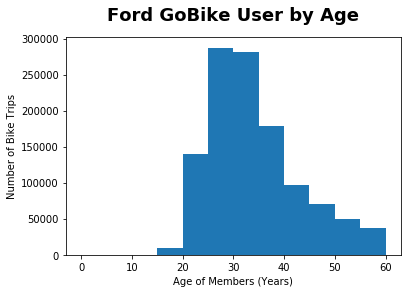

In [35]:
# Age group data
bin_edges = np.arange(0, 65, 5)

plt.hist(data = df, x = 'member_age', bins = bin_edges);

plt.title("Ford GoBike User by Age", y=1.05, fontsize=18, fontweight='bold')
plt.xlabel('Age of Members (Years)')
plt.ylabel('Number of Bike Trips');

> Observation 1: The mean age  of a Ford GoBike user is 34 years old. The data was cleaned, using for the analysis users under the age 65. The histogram shows the majority of users are adults between 25-40 years old.

In [36]:
df.start_month.describe()

count     1163397
unique          6
top         March
freq       242356
Name: start_month, dtype: object

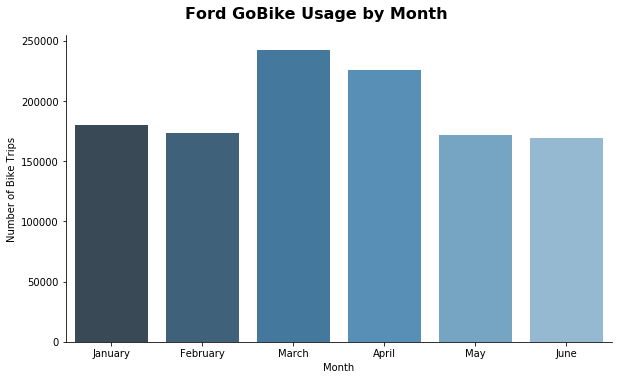

In [37]:
# Monthly usage of the Ford GoBike
Months = ['January', 'February', 'March', 'April', 'May', 'June']
graph = sb.catplot(data = df, x = 'start_month', kind = 'count', palette="Blues_d", order = Months, aspect = 1.7);

graph.set_axis_labels('Month', 'Number of Bike Trips'),

graph.fig.suptitle('Ford GoBike Usage by Month', y = 1.05, fontsize = 16, fontweight = 'bold');

> Observation 2: In the first half of 2019, the Ford GoBike use was most popular in the period between March and April. It is interesting to see that in June, early summer, the number of bike trips decreased.

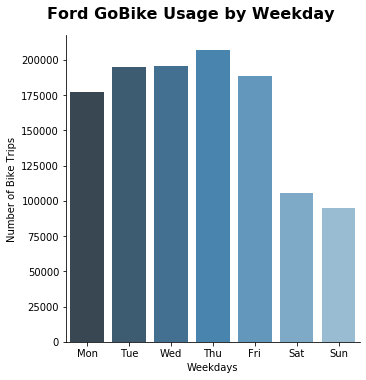

In [38]:

# Weekday usage of the Ford Go bike system
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
graph = sb.catplot(data=df, x='start_weekday', kind='count', palette="Blues_d", order = weekday)

graph.set_axis_labels('Weekdays', 'Number of Bike Trips')

graph.fig.suptitle('Ford GoBike Usage by Weekday', y=1.05, fontsize=16, fontweight='bold');

> Observation 3: Thursdays seem to be the most popular days for using the Ford GoBike, however the orthers working days are very close to the Thursdays numbers. The usage drops significantly on wewkends.

In [39]:
df.duration_min.describe()

count    1.163397e+06
mean     1.250538e+01
std      2.836627e+01
min      1.016667e+00
25%      5.683333e+00
50%      9.033333e+00
75%      1.405000e+01
max      1.435233e+03
Name: duration_min, dtype: float64

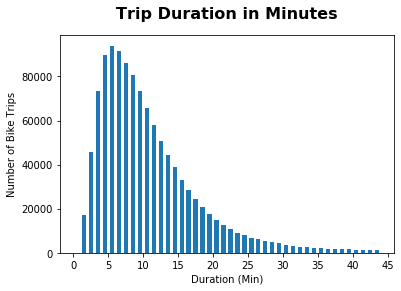

In [40]:
# Duration of the trips in minutes
bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = df, x = 'duration_min', bins = bin_edges, rwidth = 0.6);

plt.title("Trip Duration in Minutes", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Min)')
plt.xticks(ticks, labels)
plt.ylabel('Number of Bike Trips');

> Observation 4: Although the average duration is 12.5 minutes, the histogram shows that most trips are short distances, with an approximate time of 3 to 11 minutes.

In [41]:
# What about gender
gender = df.member_gender.value_counts()
gender

Male      863025
Female    278521
Other      21851
Name: member_gender, dtype: int64

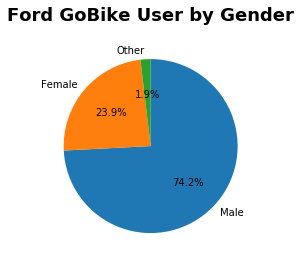

In [44]:
plt.pie(gender, labels = gender.index, startangle = 90, autopct= '%1.1f%%', counterclock = False)

plt.title('Ford GoBike User by Gender', y=1.05, fontsize=18, fontweight='bold');

> Observation 5: The pie chart shows the majority of users are male, representing 74.2% of the total users.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
> The data cleansing process was successfully executed, adding new columns made it easier during the exploration and visualization phase.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
> There was an unusual distribution for the member age, which in a case the member  age was 141. Since 99% of the members are between 18 and 64 years, I removed users older than 64.

## Bivariate Exploration
> In this section the user type will be used to the bivariate exploration, crossing with other dataset variables.

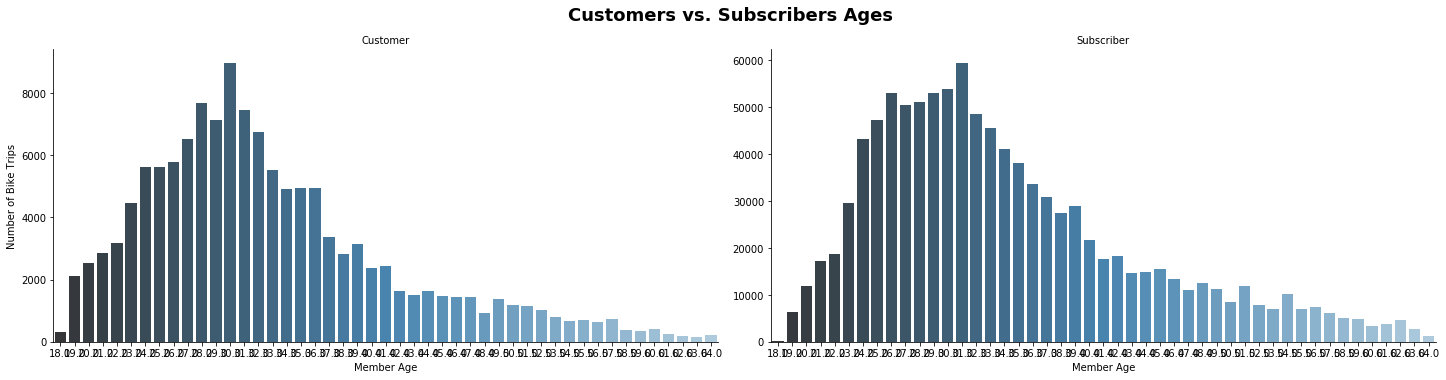

In [56]:
# # User type proportion of trips by Age
graph = sb.catplot(data = df, x = 'member_age', col='user_type', kind='count', palette="Blues_d", sharey = False, height=5, aspect=2)

graph.set_axis_labels('Member Age', 'Number of Bike Trips')
graph.set_titles('{col_name}')

graph.fig.suptitle('Customers vs. Subscribers Ages', y=1.05, fontsize=18, fontweight='bold');

> Observation 1: Both user type graphs show the high number of 31 year olds falling withing both catgoires. Customers tends to have mostly younger users.

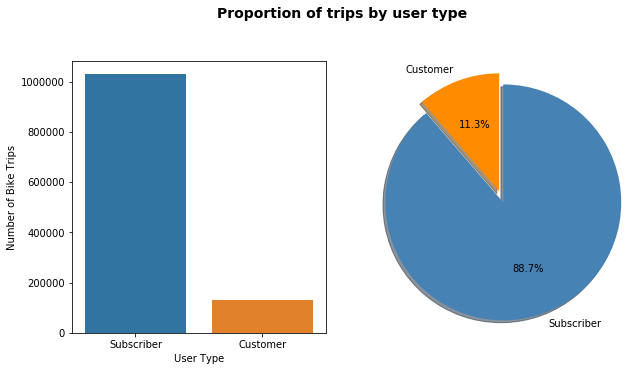

In [54]:
# calculating the proportion of trips by user type
customer = df.query('user_type == "Customer"')['member_age'].count()
subscriber = df.query('user_type == "Subscriber"')['member_age'].count()

customer_proportion = customer / df['member_age'].count()
subscriber_proportion = subscriber / df['member_age'].count()

# configurating the graphs
plt.figure(figsize = [10, 5])
plt.subplot(1, 2, 1)

graph = sb.countplot(data=df, x="user_type", order=df.user_type.value_counts().index)
graph.set_xlabel('User Type')
graph.set_ylabel('Number of Bike Trips')

plt.subplot(1, 2, 2)

labels = ['Customer', 'Subscriber']
sizes = [customer_proportion, subscriber_proportion]
colors = ['darkorange', 'steelblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('Proportion of trips by user type', y=1.03, fontsize=14, fontweight='semibold');

> Observation 2: In 88.7% of trips users were subscribers.

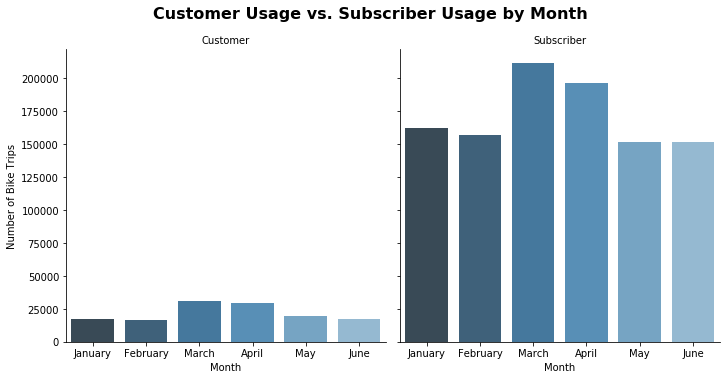

In [59]:
# Customer Usage vs. Subscriber Usage by Month
graph = sb.catplot(data=df, x='start_month', col="user_type", kind='count', sharey = True, palette="Blues_d", order=Months);

graph.set_axis_labels("Month", "Number of Bike Trips");
graph.set_titles("{col_name}");

graph.fig.suptitle('Customer Usage vs. Subscriber Usage by Month', y=1.05, fontsize=16, fontweight='bold');

> Observation 3: The graph shows similar behavior between user types, when there were more trips between March and April. 

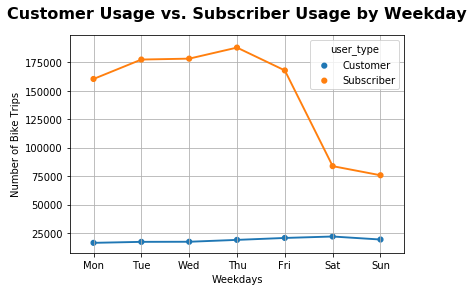

In [61]:
# Customer Usage vs. Subscriber Usage by Weekday

df_weekday = df.groupby(['start_weekday', 'user_type']).size().reset_index()

ax = sb.pointplot(data=df_weekday, x='start_weekday', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Customer Usage vs. Subscriber Usage by Weekday', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips');
plt.grid()

> Observation 4: Subscribers have a considerating usage decrease on the weekends and Customers are the opposite, when the usage increases on the weekends.

In [62]:
df.duration_min.describe(percentiles = [.95])

count    1.163397e+06
mean     1.250538e+01
std      2.836627e+01
min      1.016667e+00
50%      9.033333e+00
95%      2.763333e+01
max      1.435233e+03
Name: duration_min, dtype: float64

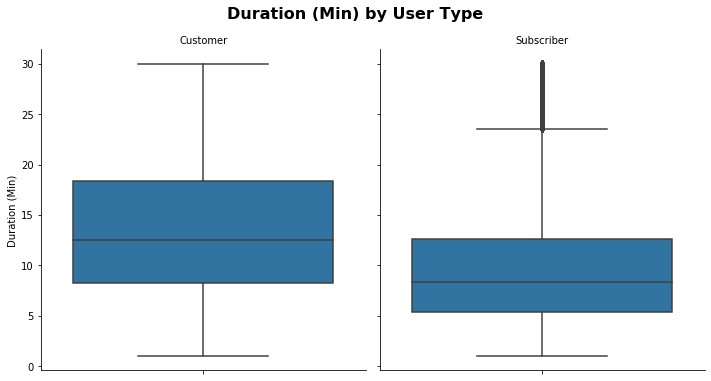

In [63]:
# working with 95th percentile
data = df.query('duration_min < 30')

g = sb.catplot(data=data, y='duration_min', col="user_type", kind='box')

g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Duration (Min)")
g.fig.suptitle('Duration (Min) by User Type', y=1.05, fontsize=16, fontweight='bold');

> Observation 5: Customer typically have trip durations are longer (8 to 18 minutes) than for subscribers (5 to 12 minutes), maybe by the fact that subscribers take short trips to work/school and customers take longer trips for a tour on the weekends 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
> The analysis revealed different behavior usage between customers and subscribers, when it is possible to suggest that customers are casual riders such as tourists and subscribers are daily riders, using the Ford GoBike for a short time during the weekdays.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
> The difference in the trip duration between customers and subscribers. Subscribers prefer quick, short rides to and from work/school. Customers prefer longer bike rides around weekends.

## Multivariate Exploration
> In this section the user type and the user gender will be used to the multivariate exploration, crossing with other dataset variables.

In [66]:
df.member_age.describe()

count    1.163397e+06
mean     3.396653e+01
std      9.410943e+00
min      1.800000e+01
25%      2.700000e+01
50%      3.200000e+01
75%      3.900000e+01
max      6.400000e+01
Name: member_age, dtype: float64

In [68]:
df['age_bins'] = df['member_age'].apply(lambda x: '15 - 25' if 15<x<=25
                                                  else '26 - 35' if 25<x<=35
                                                  else '36 - 45' if 35<x<=45
                                                  else '46 - 55' if 45<x<=55
                                                  else '56 - 65' if 55<x<=66
                                                       else x)
df.age_bins.value_counts()

26 - 35    559493
36 - 45    248884
15 - 25    201070
46 - 55    111308
56 - 65     42642
Name: age_bins, dtype: int64

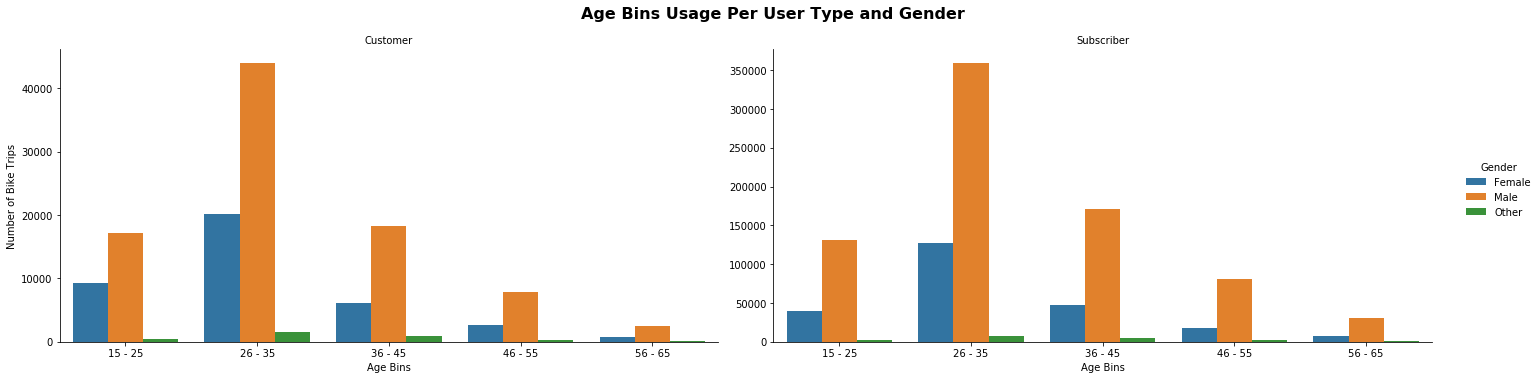

In [88]:
ages = ['15 - 25', '26 - 35', '36 - 45', '46 - 55', '56 - 65']
graph = sb.catplot(data=df, x='age_bins', col="user_type", hue="member_gender", kind='count', sharey = False, height=5, aspect=2, order=ages);

graph.set_axis_labels("Age Bins", "Number of Bike Trips")
graph._legend.set_title('Gender')
graph.set_titles("{col_name}")

graph.fig.suptitle('Age Bins Usage Per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');

> Observation 1: Male are majority between subscribers and customers. Female are close in number of trips among younger customers, 15-25 years old, and older customers, 56-65 years old.

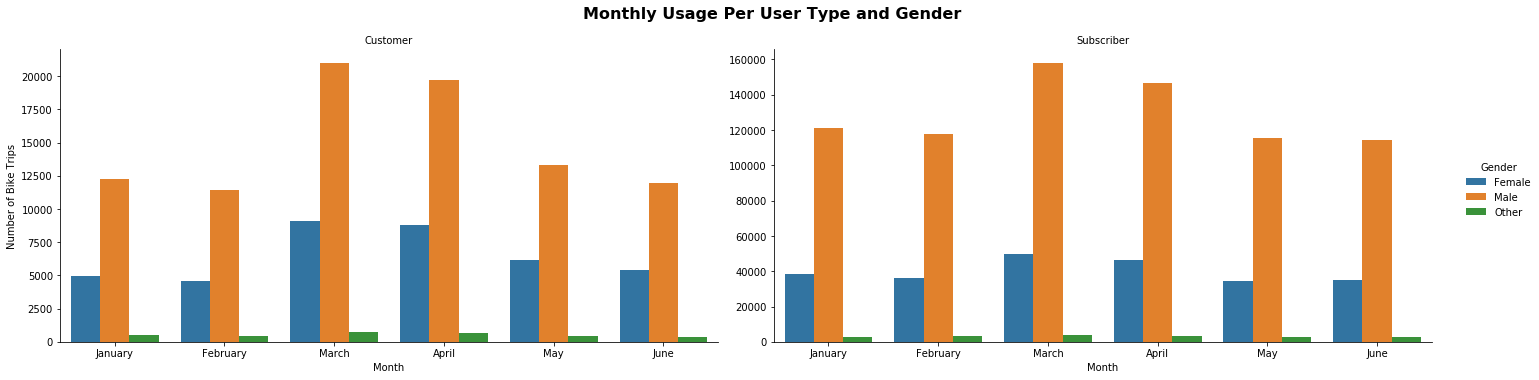

In [72]:
# Monthly usage - user type and gender
graph = sb.catplot(data=df, x='start_month', col="user_type", hue="member_gender", kind='count', sharey = False, height=5, aspect=2, order= Months);

graph.set_axis_labels("Month", "Number of Bike Trips")
graph._legend.set_title('Gender')
graph.set_titles("{col_name}")

graph.fig.suptitle('Monthly Usage Per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');

> Observation 2: The trend for males and females is very similar for customers, the highest demand is around March and April.

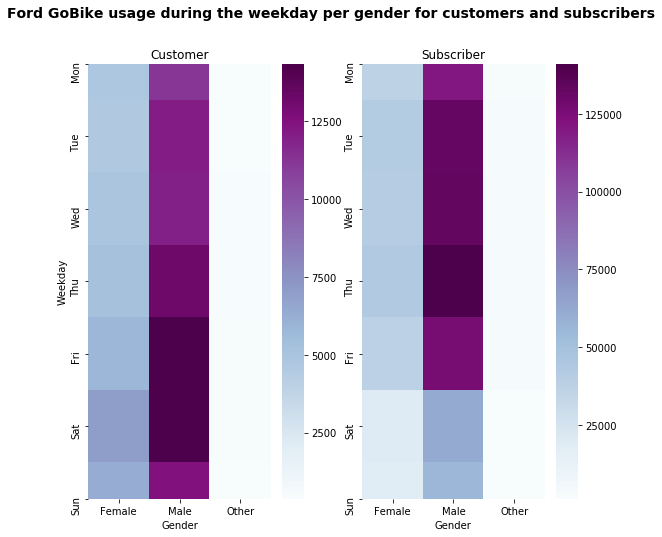

In [86]:
# Setting the weekday order
df['start_weekday'] = pd.Categorical(df['start_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('Ford GoBike usage during the weekday per gender for customers and subscribers', fontsize=14, fontweight='semibold')

# heatmap for customers
plt.subplot(1, 2, 1)
df_customer = df.query('user_type == "Customer"').groupby(["start_weekday", "member_gender"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_weekday", "member_gender", "bike_id")
sb.heatmap(df_customer, cmap="BuPu")

plt.title("Customer", y=1.015)
plt.xlabel('Gender')
plt.ylabel('Weekday')

# heatmap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = df.query('user_type == "Subscriber"').groupby(["start_weekday", "member_gender"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_weekday", "member_gender", "bike_id")
sb.heatmap(df_subscriber, cmap="BuPu")

plt.title("Subscriber", y=1.015)
plt.xlabel('Gender')
plt.ylabel('');

> Observation 3: Regardless of gender, customers had the most trips on Saturdays and subscribers had the most trips on Thursdays.

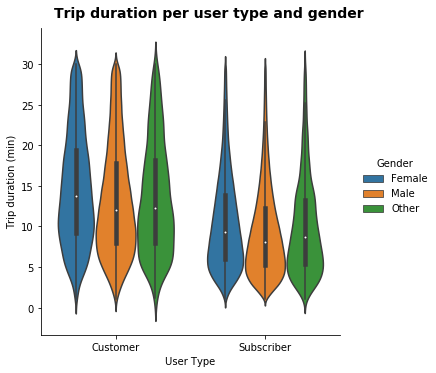

In [87]:
# working with 95th percentile
graph = sb.catplot(data=data, x='user_type', y="duration_min", hue="member_gender", kind="violin")

graph.set_axis_labels("User Type", "Trip duration (min)")
graph._legend.set_title('Gender')
graph.fig.suptitle('Trip duration per user type and gender', y=1.03, fontsize=14, fontweight='semibold');

> Observation 4:  In both cases, females take longer trips than males and other. The difference is more visible for customers than for subscribers, where other is very similar to Female.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
> Comparing user type vs gender vs others variables of the dataset is possible to explore different bahaivors in the dataset, such as, regardless of user type, male and female 25 to 36 years old have the largest number of trips in the period.

### Were there any interesting or surprising interactions between features?
> Males used the Ford GoBike more than females, but females take longer trips than males.

## Sources

- FordGoBike Data Set
- Seaborn catplot documentation
- Matplotlib histogram documentation
- IPython Display documentation
- Seaborn heatmap documentation and tutorial